In [5]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning) 
from fermipy.gtanalysis import GTAnalysis
from astropy.io import fits
from astropy.wcs import WCS

In [6]:
c = np.load('Crab_5_bin_6_2/fit0.npy', allow_pickle=True).flat[0]

In [7]:
gta = GTAnalysis('new_data/config_5_6_2.yaml',logging={'verbosity': 3},fileio={'outdir': 'Crab_5_bin_6_2'})
gta.load_roi('fit0')

2022-02-27 21:57:49 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8
2022-02-27 21:57:50 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5_bin_6_2/fit0.npy
2022-02-27 21:57:50 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2022-02-27 21:58:08 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [8]:
gta.print_roi()

2022-02-27 21:58:08 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0534.5+2200   PointSource    PLSuperExpCuto    0.003 218886.05    443581.0
4FGL J0534.5+2201s  PointSource    PowerLaw          0.005   5903.64     58571.4
4FGL J0534.5+2201i  RadialGaussian LogParabola       0.006  11809.32     31259.3
4FGL J0526.3+2246   PointSource    PowerLaw          2.037     59.81       630.4
4FGL J0544.4+2238   PointSource    PowerLaw          2.375     56.87      1928.0
isodiff             ConstantValue  FileFunction      -----   1957.99     52296.9
galdiff             MapCubeFunctio PowerLaw          -----  63703.79    174829.8



In [9]:
gta.print_params()

2022-02-27 21:58:08 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J0526.3+2246
   0 Prefactor                 1.58     0.292     1e-05     1e+03     1e-14    *
   1 Index                     2.08         0         0         5        -1     
   2 Scale                  4.4e+03         0   4.4e+03   4.4e+03         1     
4FGL J0534.5+2200
   3 Prefactor                 1.58   0.00499     1e-05     1e+03     1e-10    *
   4 Index1                    1.89         0         0         5        -1     
   5 Scale                 1.46e+03         0  1.46e+03  1.46e+03         1     
   6 Expfactor                0.437         0      -0.5       0.5      0.01     
   7 Index2                   0.667         0         0         2         1     
4FGL J0534.5+2201i
   8 norm                     0.526   0.00908     1e-05     1e+03     1e-12    

4FGL J0526.3+2246

In [10]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])
print(len(dnde))
print(len(E))

50
50


In [11]:
E = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde'])

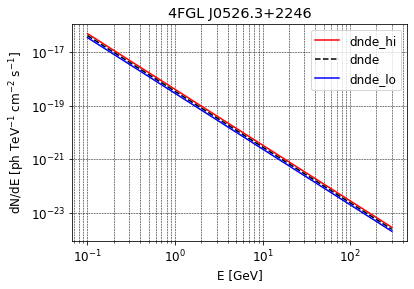

In [12]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [13]:
sed2246 = gta.sed('4FGL J0526.3+2246')

2022-02-27 21:58:08 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0526.3+2246
2022-02-27 21:58:18 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-27 21:58:32 INFO    GTAnalysis.sed(): Finished SED
2022-02-27 21:58:39 INFO    GTAnalysis.sed(): Execution time: 30.43 s


In [14]:
src = gta.roi['4FGL J0526.3+2246']

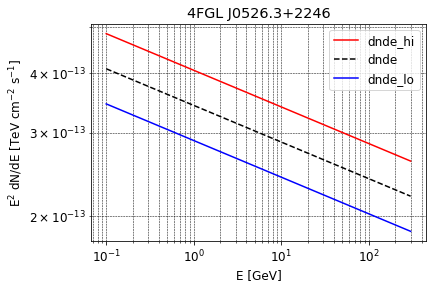

In [15]:

plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

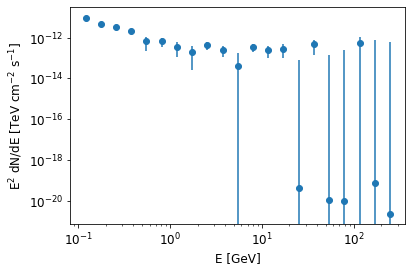

In [16]:
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

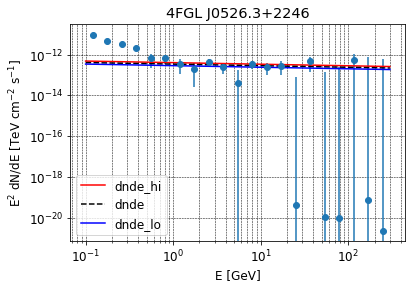

In [17]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2200

In [18]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])


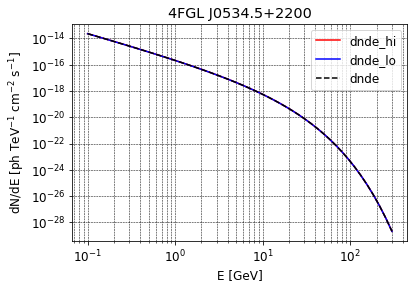

In [19]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')

plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [20]:
sed2200 = gta.sed('4FGL J0534.5+2200')

2022-02-27 21:58:41 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2200
2022-02-27 21:58:55 INFO    GTAnalysis._make_sed(): Fitting SED


Drm_Cache::update Measured counts < 0 4FGL J0534.5+2200 20 -3.83811e-11 7.57369e-12
7.09574e+07 3.12373e+07 1.13421e+07 3.55925e+06 1.02332e+06 268137 65541.6 14918.1 3072.96 577.726 99.1296 15.8539 2.27391 0.279143 0.0281891 0.00232668 0.000138194 5.40052e-06 1.25771e-07 1.4998e-09 7.57369e-12 


2022-02-27 21:59:08 INFO    GTAnalysis.sed(): Finished SED
2022-02-27 21:59:15 INFO    GTAnalysis.sed(): Execution time: 33.72 s


In [21]:
src2200 = gta.roi['4FGL J0534.5+2200']

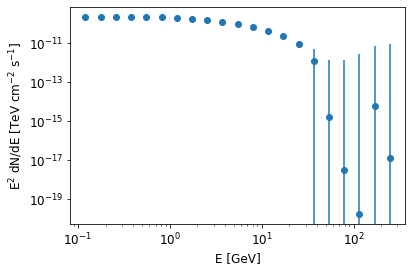

In [22]:
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

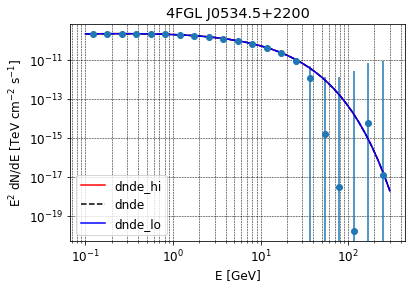

In [23]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2201i

In [24]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])


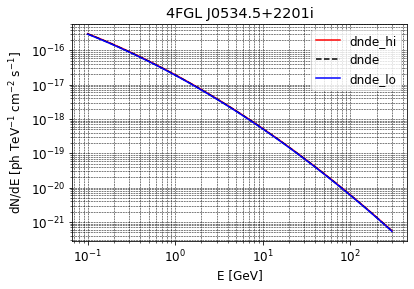

In [25]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [26]:
sed2201i = gta.sed('4FGL J0534.5+2201i')

2022-02-27 21:59:17 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201i
2022-02-27 21:59:27 INFO    GTAnalysis._make_sed(): Fitting SED
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-02-27 21:59:40 INFO    GTAnalysis.sed(): Finished SED
2022-02-27 21:59:47 INFO    GTAnalysis.sed(): Execution time: 30.80 s


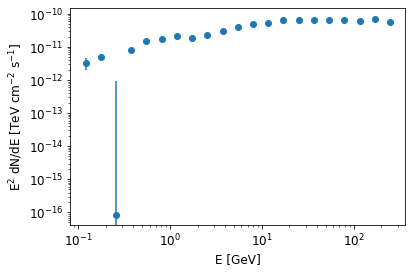

In [27]:
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

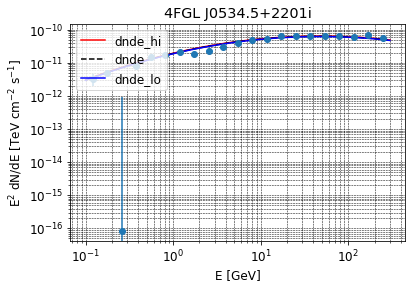

In [28]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper left')
plt.show()

4FGL J0534.5+2201s

In [29]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])


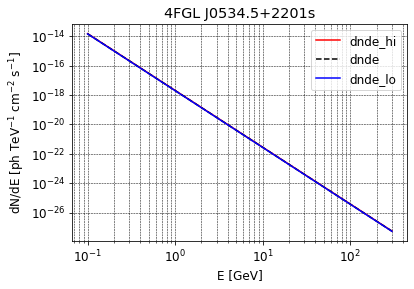

In [30]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [31]:
sed2201s = gta.sed('4FGL J0534.5+2201s')

2022-02-27 21:59:49 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201s
2022-02-27 21:59:59 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-27 22:00:15 INFO    GTAnalysis.sed(): Finished SED
2022-02-27 22:00:23 INFO    GTAnalysis.sed(): Execution time: 33.20 s


In [32]:
np.array(sed2201s['e_ctr']*1e-3)

array([1.21001290e-01, 1.77159726e-01, 2.59382099e-01, 3.79769428e-01,
       5.56032274e-01, 8.14094836e-01, 1.19192794e+00, 1.74513890e+00,
       2.55508293e+00, 3.74093360e+00, 5.47721766e+00, 8.01936536e+00,
       1.17412680e+01, 1.71905590e+01, 2.51692341e+01, 3.68510613e+01,
       5.39541680e+01, 7.89950721e+01, 1.15659151e+02, 1.69338224e+02,
       2.47930525e+02])

In [33]:
sed2201s['e2dnde']*1e-6

array([1.03851771e-10, 5.32919303e-11, 2.08185585e-11, 1.37998923e-11,
       1.10753881e-11, 5.88318196e-12, 4.17508991e-12, 6.82357104e-19,
       6.36587429e-17, 9.98443777e-17, 4.51322703e-17, 7.99864095e-13,
       9.53147056e-13, 5.22351415e-12, 4.00166902e-12, 3.81201676e-12,
       1.96037562e-15, 2.38085598e-15, 2.44298262e-15, 9.26709792e-15,
       8.45563758e-16])

In [34]:
sed2201s['e2dnde_err']*1e-6

array([1.31841630e-12, 1.14654253e-12, 1.07169272e-12, 1.08474562e-12,
       1.13470169e-12, 1.21294617e-12, 1.32833726e-12, 2.18856807e-13,
       1.96903442e-13, 2.91484888e-13, 6.33930850e-13, 2.31481723e-12,
       2.54042993e-12, 2.82229053e-12, 3.16530606e-12, 3.61221787e-12,
       4.32887976e-12, 5.23054746e-12, 6.20341377e-12, 7.23759051e-12,
       8.46203581e-12])

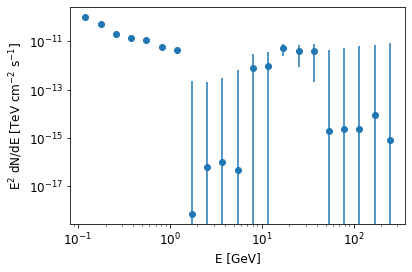

In [35]:
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             np.array(sed2201s['e2dnde']*1e-6), 
             yerr=np.array(sed2201s['e2dnde_err']*1e-6), fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

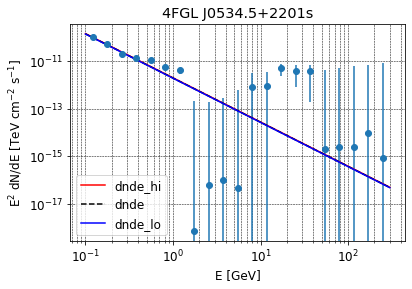

In [36]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             sed2201s['e2dnde']*1e-6, 
             yerr=sed2201s['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

4FGL J0544.4+2238

In [37]:
E = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde'])


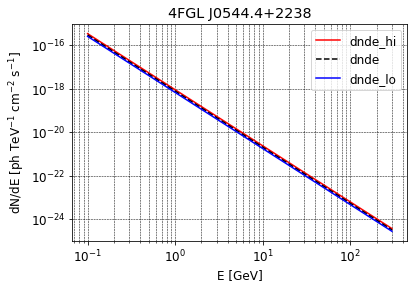

In [38]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [39]:
sed2238 = gta.sed('4FGL J0544.4+2238')

2022-02-27 22:00:24 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0544.4+2238
2022-02-27 22:00:34 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-27 22:00:50 INFO    GTAnalysis.sed(): Finished SED
2022-02-27 22:00:59 INFO    GTAnalysis.sed(): Execution time: 35.07 s


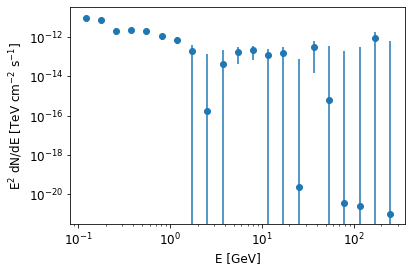

In [40]:
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

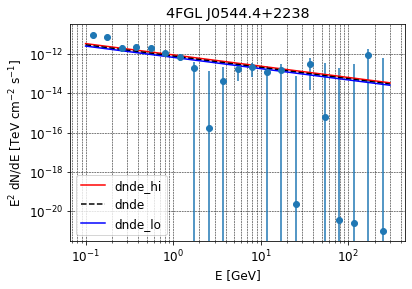

In [41]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left')
plt.show()